In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
!pip install squarify

In [ ]:
import squarify as squarify

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#https://drive.google.com/file/d/1y4_n4twjE4VSLSC-V7QsdPJ5JR9fiVgG/view?usp=sharing GooglePlayStore.csv
#https://drive.google.com/file/d/1HBgBzv4HU1wQKKblj8p--9lJEMSGYczg/view?usp=sharing GooglePlayStore_User_Reviews.csv

id1='1y4_n4twjE4VSLSC-V7QsdPJ5JR9fiVgG'
id2='1HBgBzv4HU1wQKKblj8p--9lJEMSGYczg'
downloaded1 = drive.CreateFile({'id': id1})
downloaded1.GetContentFile('GooglePlayStore.csv')
downloaded2 = drive.CreateFile({'id': id2})
downloaded2.GetContentFile('GooglePlayStore_User_Reviews.csv')

In [ ]:
appDetails=pd.read_csv('GooglePlayStore.csv')
appReviews=pd.read_csv('GooglePlayStore_User_Reviews.csv')

In [ ]:
appReviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.53
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.29
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.88
4,10 Best Foods for You,Best idea us,Positive,1.00,0.30
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
appReviews = appReviews.loc[:,['App','Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']]

In [ ]:
appReviews['App'].value_counts(dropna=False)

Angry Birds Classic                                  320
CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Name: App, Length: 1074, dtype: int64

In [ ]:
appReviews['App'].value_counts(dropna=True)

Angry Birds Classic                                  320
CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Name: App, Length: 1074, dtype: int64

Es posible observar que la columna App no tiene valores null.

In [ ]:
appReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Sentiment               37432 non-null  object 
 2   Sentiment_Polarity      37432 non-null  float64
 3   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.0+ MB


In [ ]:
validAppReviews = appReviews[~appReviews['Sentiment'].isnull()]
validAppReviews

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.53
1,10 Best Foods for You,Positive,0.25,0.29
3,10 Best Foods for You,Positive,0.40,0.88
4,10 Best Foods for You,Positive,1.00,0.30
5,10 Best Foods for You,Positive,1.00,0.30
...,...,...,...,...
64222,Housing-Real Estate & Property,Positive,0.17,0.49
64223,Housing-Real Estate & Property,Positive,0.23,0.45
64226,Housing-Real Estate & Property,Negative,-0.29,0.25
64227,Housing-Real Estate & Property,Positive,0.80,1.00


In [ ]:
appReviews['App']=appReviews['App'].astype('string')
appReviews['Sentiment']=appReviews['Sentiment'].astype('category')
appReviews['Sentiment_Polarity']=appReviews['Sentiment_Polarity'].astype('float')
appReviews['Sentiment_Subjectivity']=appReviews['Sentiment_Subjectivity'].astype('float')
appReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   App                     64295 non-null  string  
 1   Sentiment               37432 non-null  category
 2   Sentiment_Polarity      37432 non-null  float64 
 3   Sentiment_Subjectivity  37432 non-null  float64 
dtypes: category(1), float64(2), string(1)
memory usage: 1.5 MB


# Histograma

Text(0, 0.5, 'Frecuencia')

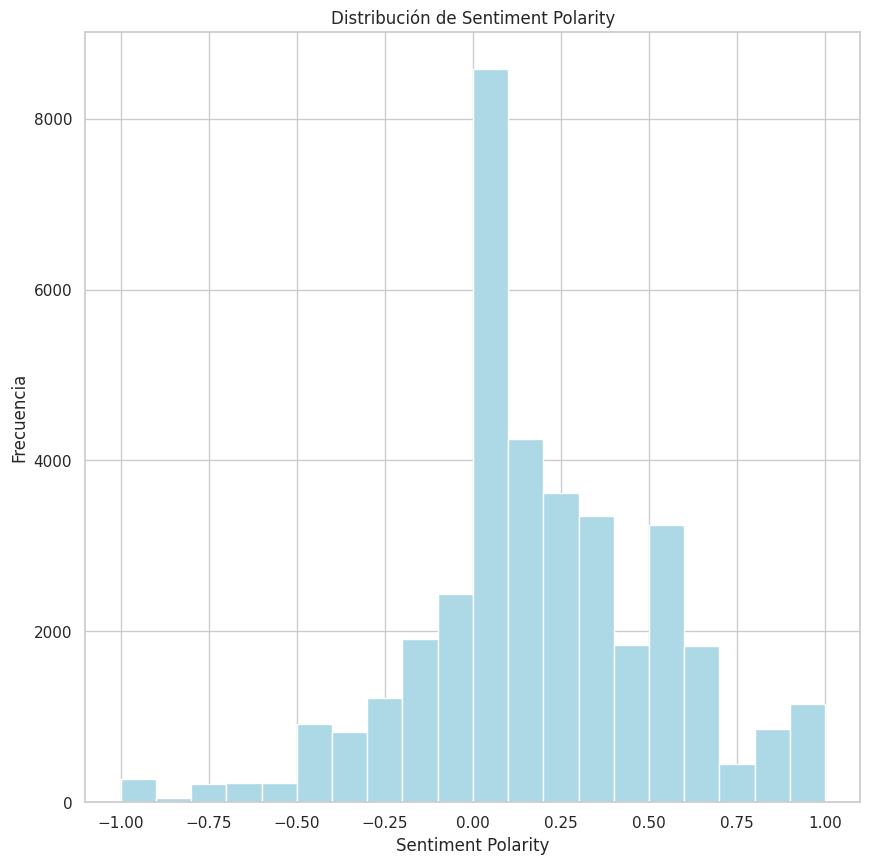

In [ ]:
g=validAppReviews['Sentiment_Polarity'].plot.hist(figsize=(10,10), bins=20, color='lightblue')
g.set_title('Distribución de Sentiment Polarity')
g.set_xlabel('Sentiment Polarity')
g.set_ylabel('Frecuencia')